In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats
import pingouin as pg
pd.set_option('display.max_columns', 1000)
from warnings import filterwarnings
filterwarnings('ignore')
path = "/Users/aryan/Desktop/ResearchClass/midterm/diabetes.csv"

In [71]:
# loading the dataset
df = pd.read_csv(path)
df



Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [72]:
# df describe
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Text(0.5, 1.0, 'Diabetes Outcome Countplot')

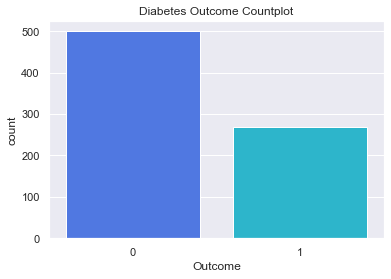

In [73]:
# diabetes outcome countlpot

sns.set_context("paper")
sns.set(style = 'darkgrid', palette='rainbow')
sns.countplot(x="Outcome", data=df)
plt.title("Diabetes Outcome Countplot", fontsize= 12)

Text(0.5, 1.0, 'BMI vs Outcome')

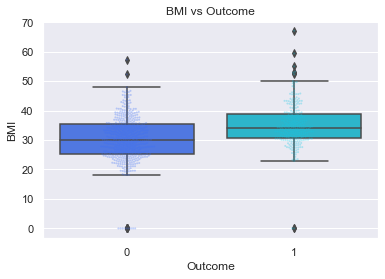

In [74]:
# BMI vs Outcome Boxplot
sns.boxplot(x='Outcome', y='BMI', data=df)
sns.swarmplot(x='Outcome', y='BMI',data=df, size=2, alpha=0.3)
plt.title("BMI vs Outcome", fontsize= 12)

Text(0.5, 1.0, 'BMI vs Outcome')

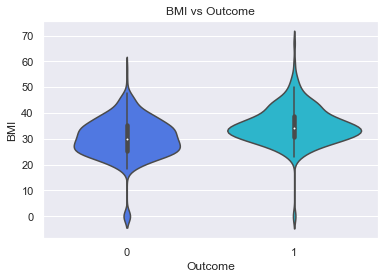

In [75]:
# BMI vs Outcome Violin
sns.violinplot(x='Outcome', y='BMI', data=df)
plt.title("BMI vs Outcome", fontsize= 12)

In [76]:
# groupby outcome to check score with and without diabetes
df.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [77]:
# groupby outcome with mean and median to check skewdness of the data
df.groupby('Outcome').agg(['mean', 'median'])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          3.298000    2.0  109.980000  107.0     68.184000   70.0   
1          4.865672    4.0  141.257463  140.0     70.824627   74.0   

        SkinThickness            Insulin               BMI         \
                 mean median        mean median       mean median   
Outcome                                                             
0           19.664000   21.0   68.792000   39.0  30.304200  30.05   
1           22.164179   27.0  100.335821    0.0  35.142537  34.25   

        DiabetesPedigreeFunction               Age         
                            mean median       mean median  
Outcome                                                    
0                       0.429734  0.336  31.190000   27.0  
1                       0.550500  0.449  37.067164   36.0

<Figure size 432x288 with 0 Axes>

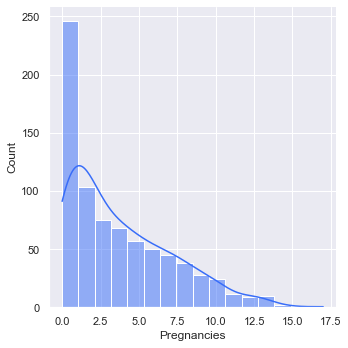

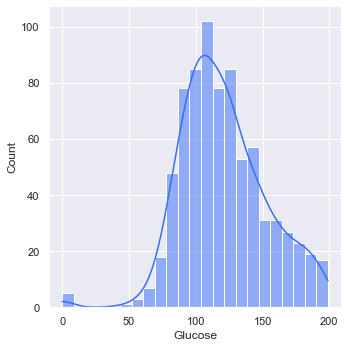

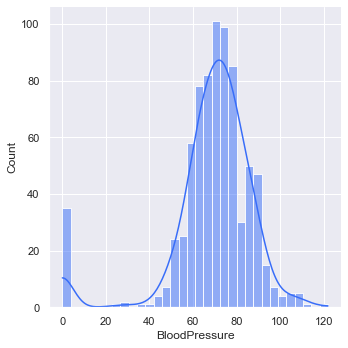

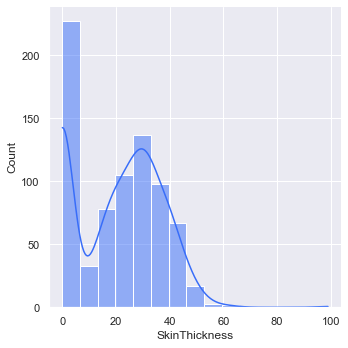

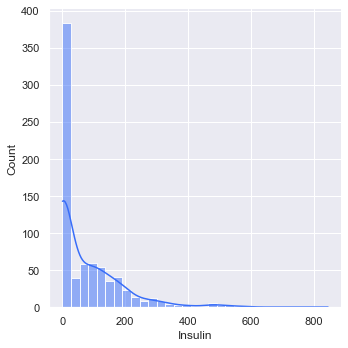

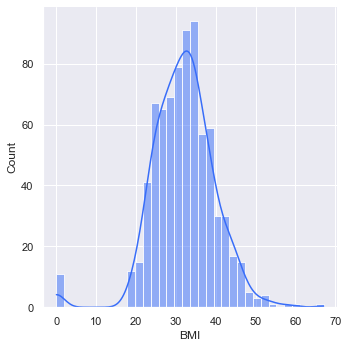

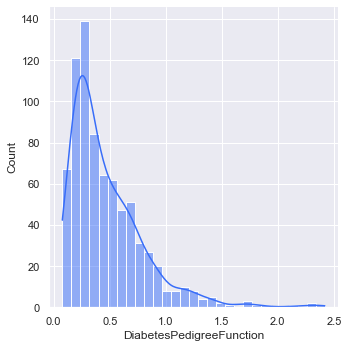

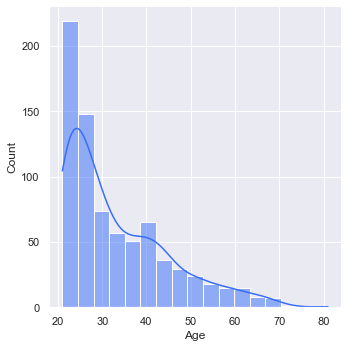

In [78]:
# histograms
sns.set(palette='rainbow')
for i, col in enumerate(df.columns[:-1]):
    plt.figure(i)
    sns.displot(df[col],kde = True)

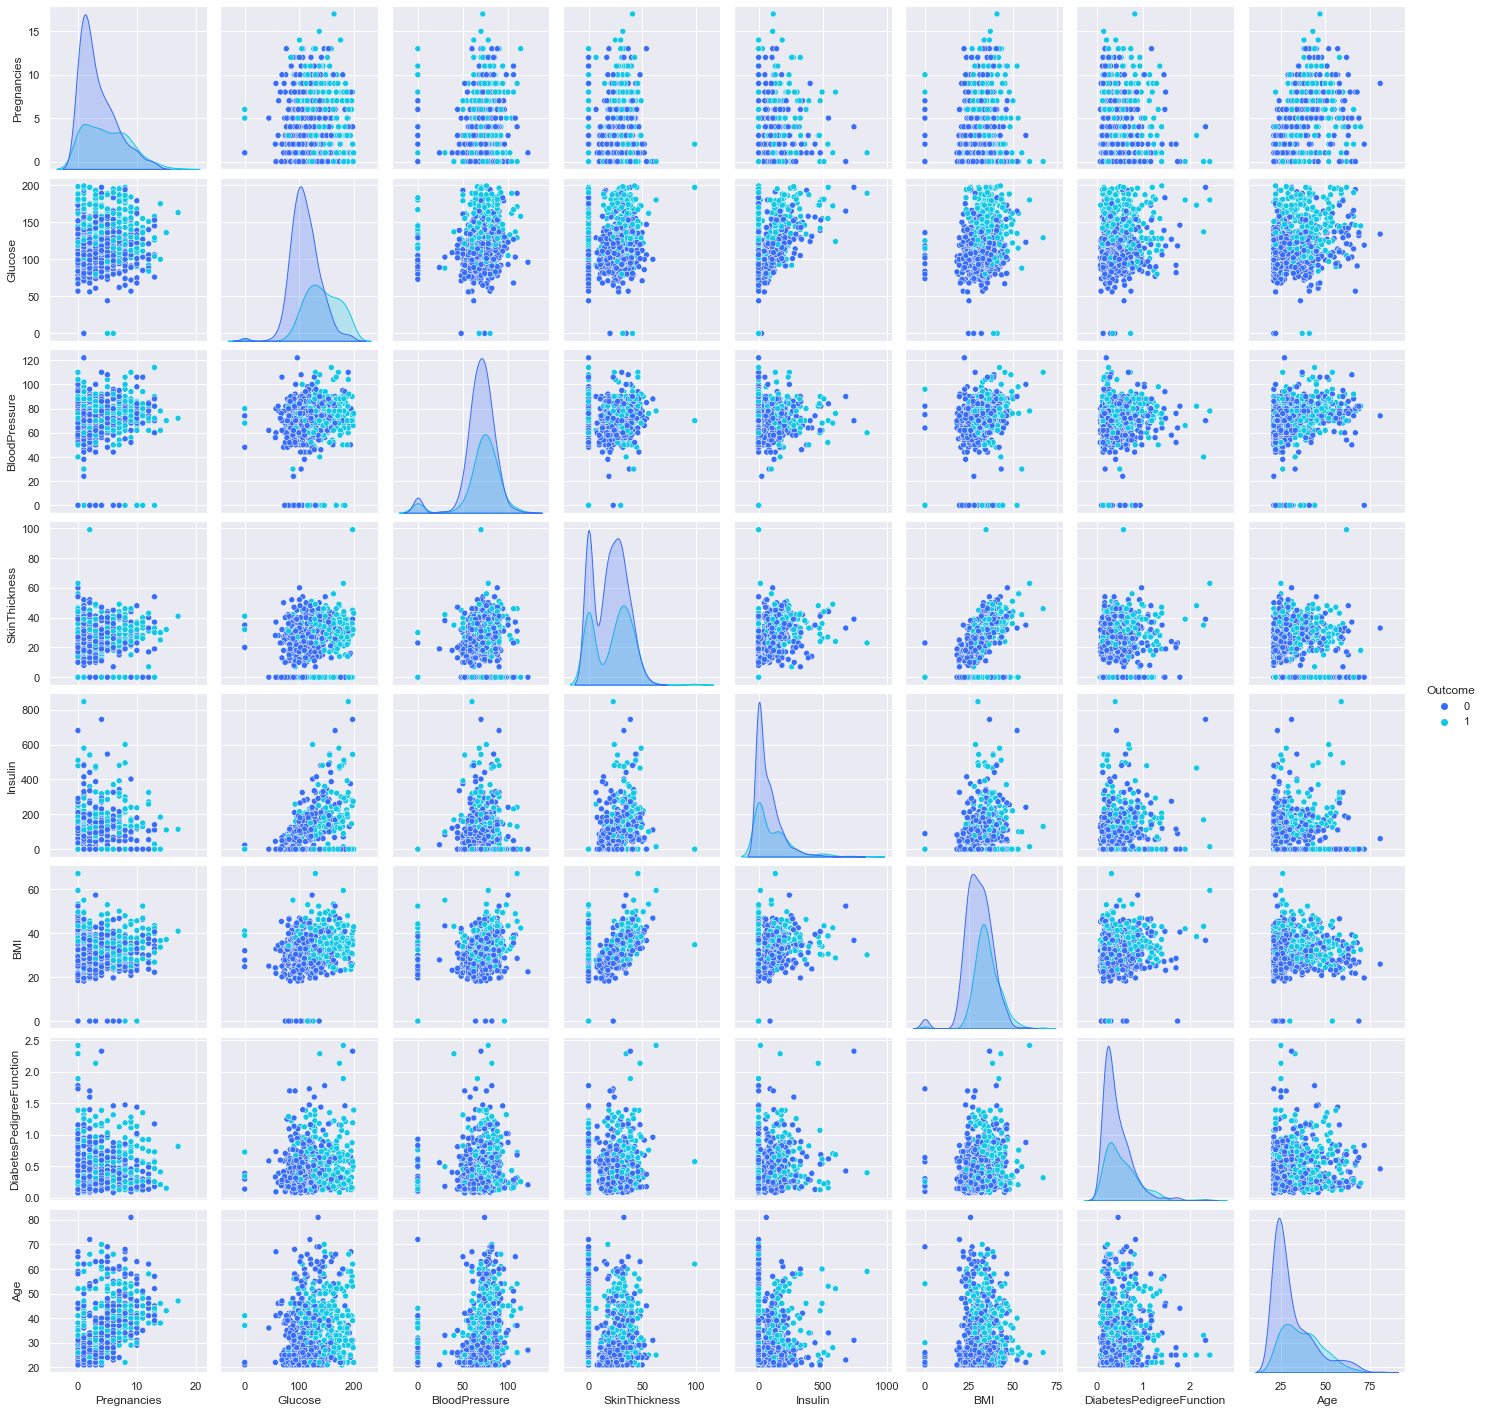

In [79]:
# pairplot for data according to outcome
# two linear trend identified BMI,skinthickness and glucose insulin
sns.pairplot(df, hue='Outcome')

Text(0.5, 1.0, 'BMI vs Glucose Scatterplot')

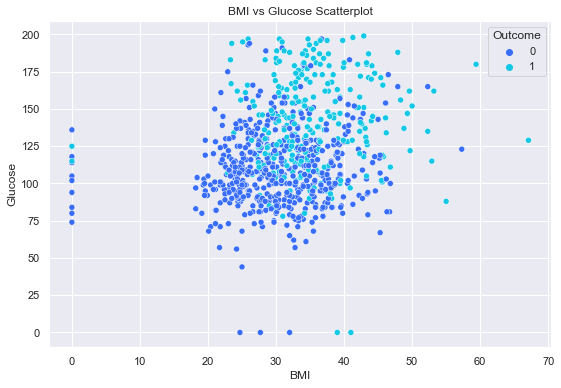

In [80]:
# Scatter plot BMI vs Glucose
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x="BMI", y="Glucose", hue="Outcome")
plt.title("BMI vs Glucose Scatterplot", fontsize= 12)

Text(0.5, 1.0, 'Blood Pressure vs Insulin Scatterplot')

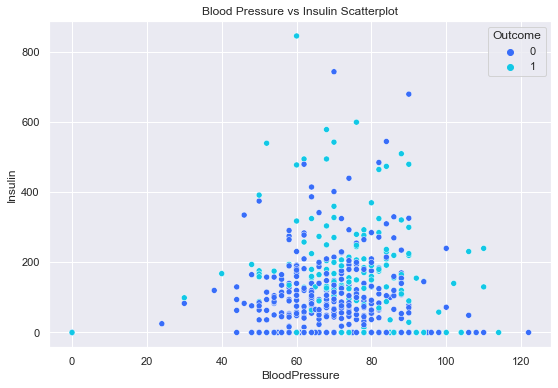

In [81]:
# Scatter plot Bloodpressure vs Insulin
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x="BloodPressure", y="Insulin", hue="Outcome")
plt.title("Blood Pressure vs Insulin Scatterplot", fontsize= 12)

Text(0.5, 1.0, 'SkinThickness vs Glucose Scatterplot')

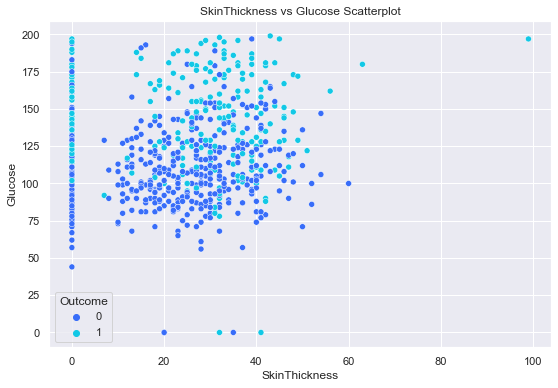

In [82]:
# skinthickness vs glucose
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x="SkinThickness", y="Glucose", hue="Outcome")
plt.title("SkinThickness vs Glucose Scatterplot", fontsize= 12)

Text(0.5, 1.0, 'Correlation heatmap')

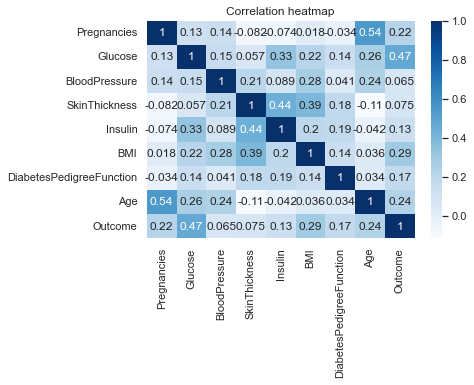

In [83]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Correlation heatmap", fontsize= 12)

In [84]:
# selecting target and features
y = df.Outcome
#  columns we need to drop that is not needed
drop_cols = ['Outcome']

x = df.drop(drop_cols, axis = 1)
x.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

Text(0.5, 1.0, 'Violinplot for all Features')

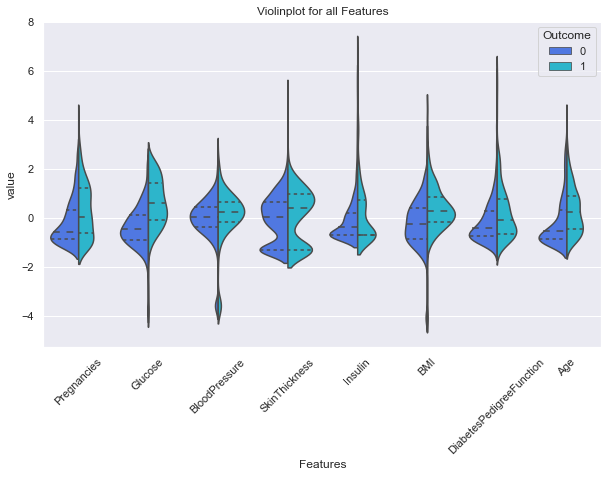

In [85]:
# standardizing the model subrtracting the mean of the data and dividing by standard deviation
# standardization is the process of putting different variables on the same scale. This process allows you to compare scores between different types of variables. Typically, to standardize variables, you calculate the mean and standard deviation for a variable. Then, for each observed value of the variable, you subtract the mean and divide by the standard deviatio
data = x
data_std = (data - data.mean()) / data.std()
# since we have 30 features very hard to plot in this screensize what we can do is to create 3 groups of 10 features
data = pd.concat([y, data_std.iloc[:, 0:10]], axis = 1)
data = pd.melt(data, id_vars = "Outcome",
                var_name= 'Features',
                value_name ='value')
# data.head(50)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Features', y='value', hue = 'Outcome', data=data, split=True, inner='quart')
plt.xticks(rotation = 45)
plt.title("Violinplot for all Features", fontsize= 12)

In [86]:
data.head()

Outcome     Features     value
0        1  Pregnancies  0.639530
1        0  Pregnancies -0.844335
2        1  Pregnancies  1.233077
3        0  Pregnancies -0.844335
4        1  Pregnancies -1.141108

Text(0.5, 1.0, 'Boxplot for all Features')

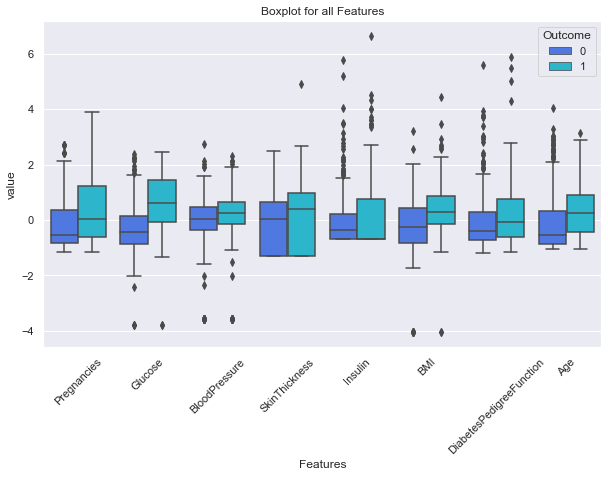

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Features', y='value', hue="Outcome", data=data)
plt.xticks(rotation = 45)
plt.title("Boxplot for all Features", fontsize= 12)

### Using Joint Plots for Feature Comparison

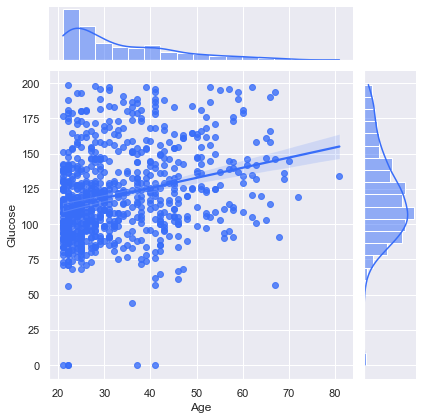

In [88]:
sns.set_theme(style=None, palette='rainbow')
sns.jointplot(x.loc[:, 'Age'],
            x.loc[:, 'Glucose'],
            kind='reg')


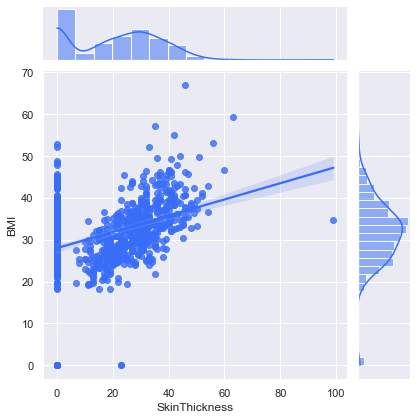

In [89]:
sns.jointplot(x.loc[:, 'SkinThickness'],
            x.loc[:, 'BMI'],
            kind='reg')


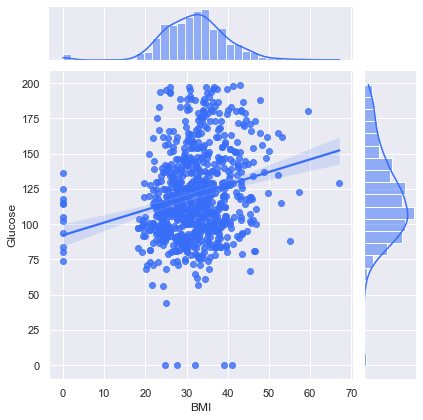

In [90]:
sns.jointplot(x.loc[:, 'BMI'],
            x.loc[:, 'Glucose'],
            kind='reg')


Text(0.5, 1.0, 'Glucose vs Outcome')

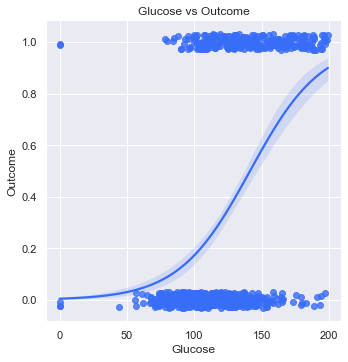

In [91]:
sns.set(style = 'darkgrid', palette='rainbow')

sns.lmplot(x='Glucose', y='Outcome', data=df,
           logistic=True, y_jitter=.03);
plt.title("Glucose vs Outcome", fontsize= 12)

Text(0.5, 1.0, 'Insulin vs Outcome')

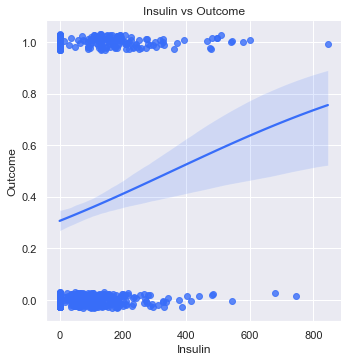

In [92]:
sns.lmplot(x='Insulin', y='Outcome', data=df,
           logistic=True, y_jitter=.03);
plt.title("Insulin vs Outcome", fontsize= 12)

Text(0.5, 1.0, 'Blood Pressure vs Outcome')

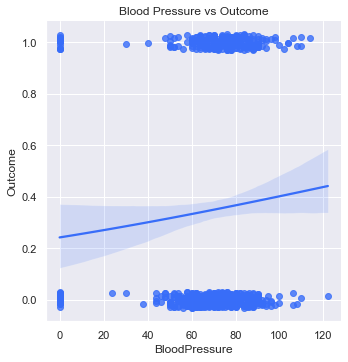

In [93]:
sns.lmplot(x='BloodPressure', y='Outcome', data=df,
           logistic=True, y_jitter=.03);
plt.title("Blood Pressure vs Outcome", fontsize= 12)

### Observing the Distribution of Values and their Variance with Swarm Plots

Text(0.5, 1.0, 'Observing the Distribution of Values and their Variance')

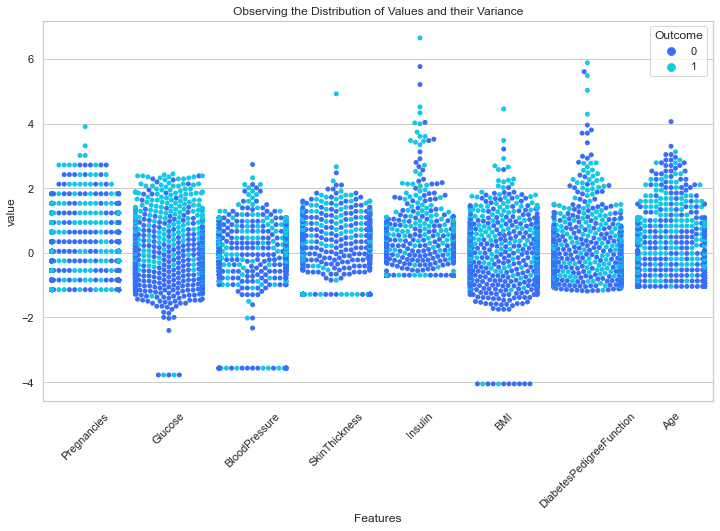

In [94]:
sns.set(style = 'whitegrid', palette='rainbow')
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0:10]], axis = 1)
data = pd.melt(data, id_vars = "Outcome",
                var_name= 'Features',
                value_name ='value')

plt.figure(figsize=(12, 7))
sns.swarmplot(x='Features', y='value', hue = 'Outcome', data=data)
plt.xticks(rotation = 45)
plt.title("Observing the Distribution of Values and their Variance", fontsize= 12)

### Conducting T-Test between features

Text(0.5, 1.0, 'Independent Sample T-Test between BMI for diabetic and non diabetic')

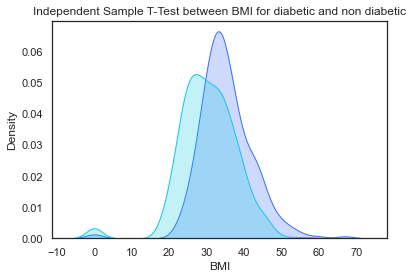

In [95]:
# Independent Sample T-Test between BMI & Insulin on non standardized data
sns.set_style('white')
positive = df[df['Outcome']==1]
negative = df[df['Outcome']==0]
sns.kdeplot(positive['BMI'], shade=True)
sns.kdeplot(negative['BMI'], shade=True)
plt.title("Independent Sample T-Test between BMI for diabetic and non diabetic")

In [96]:
tStat, pValue = stats.ttest_ind(positive['BMI'], negative['BMI'], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:6.56623762470833e-17 T-Statistic:8.619316881357946


Text(0.5, 1.0, 'Independent Sample T-Test between Glucose for diabetic and non diabetic')

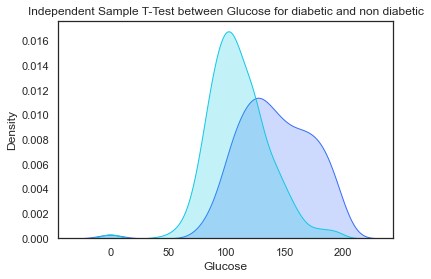

In [97]:
# Independent Sample T-Test between Glucose 
sns.kdeplot(positive['Glucose'], shade=True)
sns.kdeplot(negative['Glucose'], shade=True)
plt.title("Independent Sample T-Test between Glucose for diabetic and non diabetic")

In [98]:
tStat, pValue = stats.ttest_ind(positive['Glucose'], negative['Glucose'], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:2.6441613495403223e-36 T-Statistic:13.751537067396411


In [99]:
# Independent Sample T-Test between BloodPressure 
sns.kdeplot(positive['BloodPressure'], shade=True)
sns.kdeplot(negative['BloodPressure'], shade=True)
plt.title("Independent Sample T-Test between Blood Pressure for diabetic and non diabetic")

Text(0.5, 1.0, 'Independent Sample T-Test between Blood Pressure for diabetic and non diabetic')

In [100]:
tStat, pValue = stats.ttest_ind(positive['BloodPressure'], negative['BloodPressure'], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.08735424821461578 T-Statistic:1.7130865949770784


Text(0.5, 1.0, 'Independent Sample T-Test between Insulin for diabetic and non diabetic')

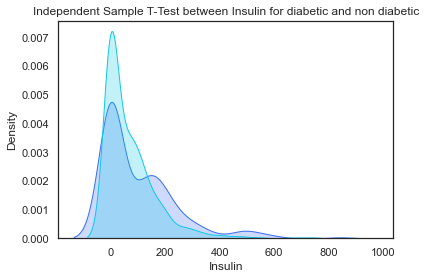

In [101]:
# Independent Sample T-Test between Insulin 
sns.kdeplot(positive['Insulin'], shade=True)
sns.kdeplot(negative['Insulin'], shade=True)
plt.title("Independent Sample T-Test between Insulin for diabetic and non diabetic")

In [102]:
tStat, pValue = stats.ttest_ind(positive['Insulin'], negative['Insulin'], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.0010469286528313425 T-Statistic:3.3008947714793337


### Standardizing the data and checking if t-test results are different from non standardized data

In [103]:
# t-tests for standardize data
# by standardizing we take account lot of 0's in data
df_standardized = (df - df.mean()) / df.std()
positive_standardized = df[df['Outcome']==1]
negative_standardized = df[df['Outcome']==0]

Text(0.5, 1.0, 'Independent Sample T-Test between BMI for diabetic and non diabetic')

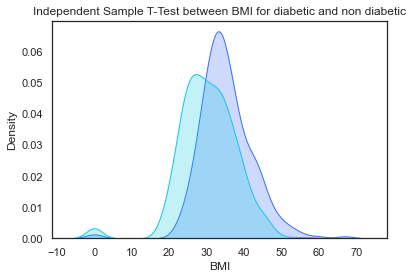

In [104]:
# Independent Sample T-Test between BMI & Insulin on standardized data
sns.kdeplot(positive_standardized['BMI'], shade=True)
sns.kdeplot(negative_standardized['BMI'], shade=True)
plt.title("Independent Sample T-Test between BMI for diabetic and non diabetic")

In [105]:
tStat, pValue = stats.ttest_ind(positive_standardized['BMI'], negative_standardized['BMI'], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:6.56623762470833e-17 T-Statistic:8.619316881357946


Text(0.5, 1.0, 'Independent Sample T-Test between Glucose for diabetic and non diabetic')

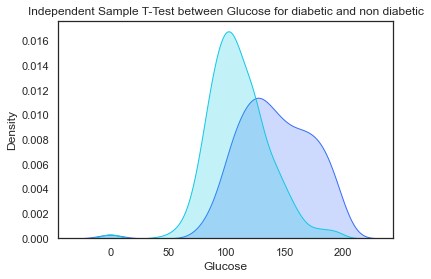

In [106]:
# Independent Sample T-Test between Glucose 
sns.kdeplot(positive_standardized['Glucose'], shade=True)
sns.kdeplot(negative_standardized['Glucose'], shade=True)
plt.title("Independent Sample T-Test between Glucose for diabetic and non diabetic")

In [107]:
tStat, pValue = stats.ttest_ind(positive_standardized['Glucose'], negative_standardized['Glucose'], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:2.6441613495403223e-36 T-Statistic:13.751537067396411


In [108]:
# Independent Sample T-Test between BloodPressure 
sns.kdeplot(positive_standardized['BloodPressure'], shade=True)
sns.kdeplot(negative_standardized['BloodPressure'], shade=True)
plt.title("Independent Sample T-Test between Blood Pressure for diabetic and non diabetic")

Text(0.5, 1.0, 'Independent Sample T-Test between Blood Pressure for diabetic and non diabetic')

In [109]:
tStat, pValue = stats.ttest_ind(positive_standardized['BloodPressure'], negative_standardized['BloodPressure'], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.08735424821461578 T-Statistic:1.7130865949770784


##### Summary
Even after standardizing the data t-test results are almost similar to non standardized data

### Testing Normality with qqplot & Shapiro-Wilk Test

In [110]:
# BMI qqplot
sns.set_style('darkgrid')
pg.qqplot(df.BMI)

# Shapiro-Wilk Test
from scipy.stats import shapiro
stat,p = shapiro(df.BMI)
print(f'stat={stat}.3f, p={p}.3f\n' )
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably Not Gaussian')

stat=0.9499887824058533.3f, p=1.8405621485603632e-15.3f

Probably Not Gaussian


stat=0.9701042175292969.3f, p=1.9867612763291298e-11.3f

Probably Not Gaussian


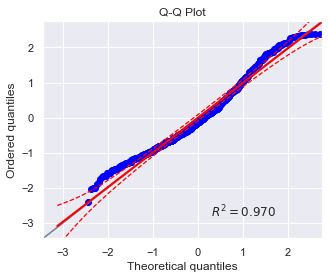

In [111]:
# Glucose qqplot
pg.qqplot(df.Glucose)
# Shapiro-Wilk Test
stat,p = shapiro(df.Glucose)
print(f'stat={stat}.3f, p={p}.3f\n' )
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably Not Gaussian')

stat=0.8189212083816528.3f, p=1.5840069624449098e-28.3f

Probably Not Gaussian


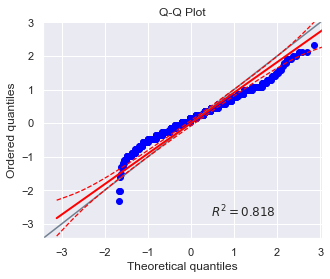

In [112]:
# Blood Pressure qqplot
pg.qqplot(df.BloodPressure)
# Shapiro-Wilk Test
stat,p = shapiro(df.BloodPressure)
print(f'stat={stat}.3f, p={p}.3f\n' )
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably Not Gaussian')

In [113]:
# Insulin qqplot
pg.qqplot(df.Insulin)
# Shapiro-Wilk Test
stat,p = shapiro(df.Insulin)
print(f'stat={stat}.3f, p={p}.3f\n' )
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably Not Gaussian')

stat=0.7220207452774048.3f, p=7.915248149269491e-34.3f

Probably Not Gaussian


### One Way Annova

In [114]:
# binning age by 3 categories
df['Age_bin'] = pd.cut(x=df['Age'], bins=[20,41,61,81],
                           labels = ['20-41 Years','42-61 Years','61-81 Years'])
data = df
# drop columns
drop_cols = ['Outcome', 'DiabetesPedigreeFunction', 'SkinThickness','Pregnancies','Age']

data = df.drop(drop_cols, axis = 1)
data

Glucose  BloodPressure  Insulin   BMI      Age_bin
0        148             72        0  33.6  42-61 Years
1         85             66        0  26.6  20-41 Years
2        183             64        0  23.3  20-41 Years
3         89             66       94  28.1  20-41 Years
4        137             40      168  43.1  20-41 Years
..       ...            ...      ...   ...          ...
763      101             76      180  32.9  61-81 Years
764      122             70        0  36.8  20-41 Years
765      121             72      112  26.2  20-41 Years
766      126             60        0  30.1  42-61 Years
767       93             70        0  30.4  20-41 Years

[768 rows x 5 columns]

In [115]:
# age vs blood pressure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_bin', y='Glucose', data=data)
plt.title("One Way Anova Age Categories vs Glucose")

Text(0.5, 1.0, 'One Way Anova Age Categories vs Glucose')

In [116]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Glucose ~ Age_bin',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq     df          F    PR(>F)
Age_bin    24748.894217    2.0  12.467085  0.000005
Residual  759315.562815  765.0        NaN       NaN


In [117]:
#post hoc corrections (Bonferroni)
pair_t = mod.t_test_pairwise('Age_bin')
pair_t.result_frame

coef   std err         t     P>|t|  \
42-61 Years-20-41 Years  12.602212  2.901303  4.343639  0.000016   
61-81 Years-20-41 Years  18.272416  6.431808  2.840945  0.004618   
61-81 Years-42-61 Years   5.670204  6.815787  0.831922  0.405712   

                         Conf. Int. Low  Conf. Int. Upp.  pvalue-hs  reject-hs  
42-61 Years-20-41 Years        6.906752        18.297672   0.000048       True  
61-81 Years-20-41 Years        5.646327        30.898505   0.009214       True  
61-81 Years-42-61 Years       -7.709661        19.050069   0.405712      False

Between 42-61 Years and 20-41 Years	reject-hs, as you grow older glucose increases

Text(0.5, 1.0, 'One Way Anova Age Categories vs Insulin')

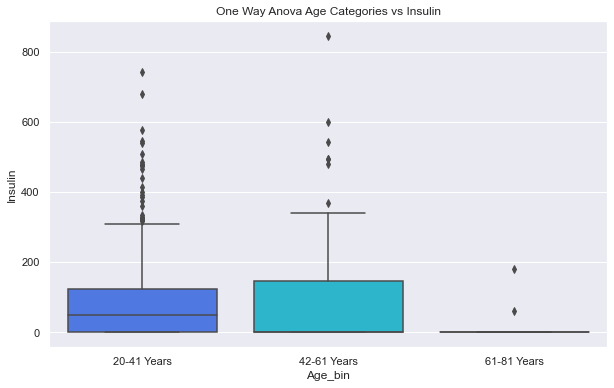

In [118]:
# Another one way annova age vs Glucose
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_bin', y='Insulin', data=data)
plt.title("One Way Anova Age Categories vs Insulin")

In [119]:
mod = ols('Insulin ~ Age_bin',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
Age_bin   1.344487e+05    2.0  5.115948  0.006207
Residual  1.005222e+07  765.0       NaN       NaN


In [120]:
#post hoc corrections (Bonferroni)
pair_t = mod.t_test_pairwise('Age_bin')
pair_t.result_frame

coef    std err         t     P>|t|  \
42-61 Years-20-41 Years   7.761916  10.556326  0.735286  0.462391   
61-81 Years-20-41 Years -71.025839  23.401994 -3.035034  0.002487   
61-81 Years-42-61 Years -78.787755  24.799090 -3.177042  0.001548   

                         Conf. Int. Low  Conf. Int. Upp.  pvalue-hs  reject-hs  
42-61 Years-20-41 Years      -12.960890        28.484722   0.462391      False  
61-81 Years-20-41 Years     -116.965587       -25.086091   0.004967       True  
61-81 Years-42-61 Years     -127.470101       -30.105409   0.004636       True

Glucose also increases as there is signidicant difference

In [121]:
# Another one way annova this time converting BMI to bins
# binning BMI by 4 categories as per https://www.cancer.org/cancer/cancer-causes/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html
df['BMI_bin'] = pd.cut(x=df['BMI'], bins=[0,18.5,24.9,29.9,70],
                           labels = ['0-18.5 Underweight','18.6-24.9 Normal','25-29.9 Overweight', '30 or more Obese'])
data = df
# drop columns
drop_cols = ['Outcome', 'DiabetesPedigreeFunction', 'SkinThickness','Pregnancies','Age']

data = df.drop(drop_cols, axis = 1)


Text(0.5, 1.0, 'One Way Anova BMI Categories vs Glucose')

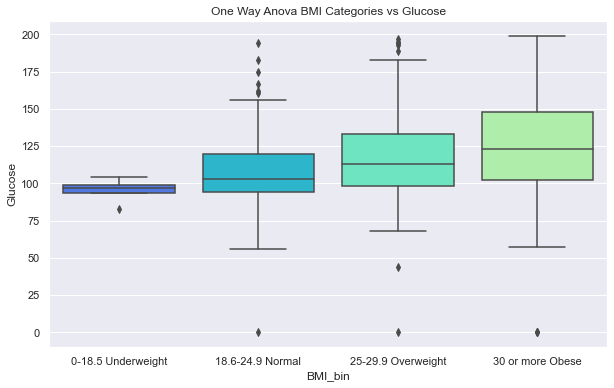

In [122]:
# BMI vs Glucose
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI_bin', y='Glucose', data=data)
plt.title("One Way Anova BMI Categories vs Glucose")

In [123]:
mod = ols('Glucose ~ BMI_bin',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq     df          F        PR(>F)
BMI_bin    35674.853359    3.0  12.076956  9.981209e-08
Residual  741444.132110  753.0        NaN           NaN


In [124]:
#post hoc corrections (Bonferroni)
pair_t = mod.t_test_pairwise('BMI_bin')
pair_t.result_frame

coef    std err         t  \
18.6-24.9 Normal-0-18.5 Underweight    12.730392  15.994276  0.795934   
25-29.9 Overweight-0-18.5 Underweight  21.096369  15.863929  1.329833   
30 or more Obese-0-18.5 Underweight    30.764831  15.755936  1.952587   
25-29.9 Overweight-18.6-24.9 Normal     8.365977   3.892856  2.149059   
30 or more Obese-18.6-24.9 Normal      18.034438   3.426309  5.263517   
30 or more Obese-25-29.9 Overweight     9.668462   2.754449  3.510126   

                                              P>|t|  Conf. Int. Low  \
18.6-24.9 Normal-0-18.5 Underweight    4.263211e-01      -18.668281   
25-29.9 Overweight-0-18.5 Underweight  1.839761e-01      -10.046418   
30 or more Obese-0-18.5 Underweight    5.123875e-02       -0.165953   
25-29.9 Overweight-18.6-24.9 Normal    3.194783e-02        0.723836   
30 or more Obese-18.6-24.9 Normal      1.844946e-07       11.308184   
30 or more Obese-25-29.9 Overweight    4.745342e-04        4.261150   

                                       Conf. Int. Upp.  pvalue-hs  reject-hs  
18.6-24.9 Normal-0-18.5 Underweight          44.129065   0.426321      False  
25-29.9 Overweight-0-18.5 Underweight        52.239156   0.334105      False  
30 or more Obese-0-18.5 Underweight          61.695614   0.145975      False  
25-29.9 Overweight-18.6-24.9 Normal          16.008117   0.121797      False  
30 or more Obese-18.6-24.9 Normal            24.760693   0.000001       True  
30 or more Obese-25-29.9 Overweight          15.075774   0.002370       True

## Two Way Annova's

In [125]:
# Two Way Anova for Glucose with Age and BMI 
plt.figure(figsize=(10, 6))
sns.boxplot(x="BMI_bin", y="Glucose", hue="Age_bin", data=data )
plt.title("Two Way Anova for Glucose with Age and BMI")

Text(0.5, 1.0, 'Two Way Anova for Glucose with Age and BMI')

In [126]:
#doing the 2 way anova with statsmodels
model = ols('Glucose ~ C(BMI_bin) + C(Age_bin) + C(BMI_bin):C(Age_bin)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df             F        PR(>F)
C(BMI_bin)             3.567485e+04    3.0  1.241663e+01  6.238334e-08
C(Age_bin)             5.267262e-10    2.0  2.749905e-13  1.000000e+00
C(BMI_bin):C(Age_bin)  2.602934e+04    6.0  4.529753e+00  1.601104e-04
Residual               7.154148e+05  747.0           NaN           NaN

In [127]:
data.dtypes
data['BMI_bin'] = data['BMI_bin'].astype(str)

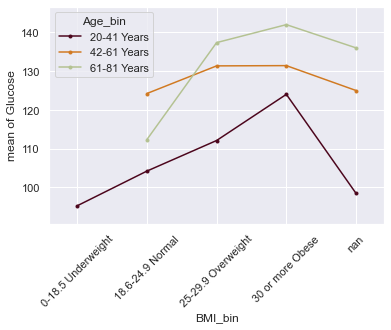

In [128]:
#interaction plot
from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(data['BMI_bin'], data['Age_bin'], data['Glucose'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.xticks(rotation = 45)
plt.show()

In [129]:

#post hoc test for main effect BMI_bin
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var='BMI_bin', anova_model='Glucose ~ C(BMI_bin) + C(Age_bin) + C(BMI_bin):C(Age_bin)')
res.tukey_summary


group1              group2       Diff      Lower      Upper  \
0    30 or more Obese  25-29.9 Overweight   9.668462   2.240274  17.096649   
1    30 or more Obese    18.6-24.9 Normal  18.034438   8.794380  27.274497   
2    30 or more Obese                 nan  21.742103  -4.068377  47.552584   
3    30 or more Obese  0-18.5 Underweight  30.764831 -11.725719  73.255380   
4  25-29.9 Overweight    18.6-24.9 Normal   8.365977  -2.132262  18.864215   
5  25-29.9 Overweight                 nan  12.073641 -14.213527  38.360810   
6  25-29.9 Overweight  0-18.5 Underweight  21.096369 -21.685416  63.878154   
7    18.6-24.9 Normal                 nan   3.707665 -23.147799  30.563129   
8    18.6-24.9 Normal  0-18.5 Underweight  12.730392 -30.402911  55.863695   
9                 nan  0-18.5 Underweight   9.022727 -40.386625  58.432079   

    q-value   p-value  
0  5.033392  0.003622  
1  7.547691  0.001000  
2  3.257554  0.144753  
3  2.799938  0.276919  
4  3.081672  0.188651  
5  1.776154  0.692696  
6  1.906931  0.640290  
7  0.533893  0.900000  
8  1.141341  0.900000  
9  0.706179  0.900000

### linnear Regression

In [130]:

data = df
# drop columns
drop_cols = ['Outcome','DiabetesPedigreeFunction','Pregnancies', 'BMI','Age_bin','BMI_bin']

data = df.drop(drop_cols, axis = 1)
x = data
y = df['BMI']


In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [132]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)



LinearRegression()

In [133]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['f'])
coeff_df



f
Glucose        0.053729
BloodPressure  0.066212
SkinThickness  0.185701
Insulin       -0.003686
Age           -0.021317

In [134]:
y_pred = regressor.predict(X_test)
df_score = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_score

Actual  Predicted
661    42.9  41.556800
122    33.6  33.677324
113    34.0  25.972100
14     25.8  33.798867
529    24.6  27.923337
..      ...        ...
476    33.7  36.289348
482    27.8  30.031686
230    44.0  31.171224
527    26.3  31.335614
380    30.8  33.589928

[154 rows x 2 columns]

In [135]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 5.220901455625269
Mean Squared Error: 49.52461501490933
Root Mean Squared Error: 7.037372735254921


### Ancova

In [136]:
data = df

data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome      Age_bin             BMI_bin  
0                       0.627   50        1  42-61 Years    30 or more Obese  
1                       0.351   31        0  20-41 Years  25-29.9 Overweight  
2                       0.672   32        1  20-41 Years    18.6-24.9 Normal  
3                       0.167   21        0  20-41 Years  25-29.9 Overweight  
4                       2.288   33        1  20-41 Years    30 or more Obese  
..                        ...  ...      ...          ...                 ...  
763                     0.171   63        0  61-81 Years    30 or more Obese  
764                     0.340   27        0  20-41 Years    30 or more Obese  
765                     0.245   30        0  20-41 Years  25-29.9 Overweight  
766                     0.349   47        1  42-61 Years    30 or more Obese  
767                     0.315   23        0  20-41 Years    30 or more Obese  

[768 rows x 11 columns]

In [137]:
# BMI vs Glucose
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI_bin', y='Glucose', data=data)
plt.title("Ancova BMI Categories vs Glucose & Blood Pressuere")

Text(0.5, 1.0, 'Ancova BMI Categories vs Glucose & Blood Pressuere')

In [307]:
#building ancova model
from pingouin import ancova
ancova(data=df,dv='Glucose',covar='BloodPressure',between='BMI_bin')

Source             SS   DF          F     p-unc       np2
0        BMI_bin   29858.484494    3  10.208332  0.000001  0.039131
1  BloodPressure    8265.936155    1   8.478135  0.003701  0.011148
2       Residual  733178.195956  752        NaN       NaN       NaN

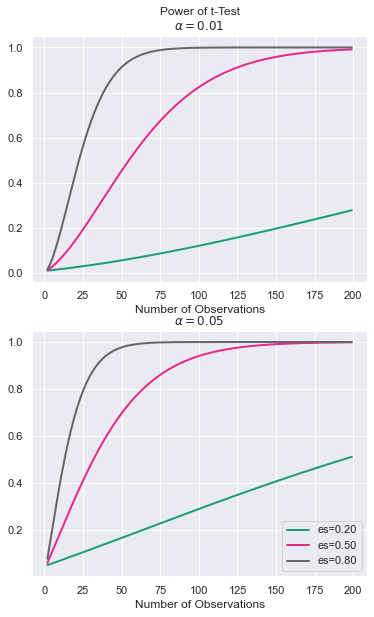

In [308]:
# power vs. number of observations 

from statsmodels.stats.power import TTestIndPower

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()

ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 2)

In [309]:
# parameters for the analysis 
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)
print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52


In [310]:
#building ancova model
from pingouin import ancova
ancova(data=df,dv='Glucose',covar=['BloodPressure','BMI','Age'],between='BMI_bin')

Source             SS   DF          F         p-unc       np2
0        BMI_bin    1957.257083    3   0.712183  5.448781e-01  0.002841
1  BloodPressure    1180.126729    1   1.288230  2.567369e-01  0.001715
2            BMI    6260.104945    1   6.833552  9.125606e-03  0.009029
3            Age   41970.978316    1  45.815663  2.621006e-11  0.057571
4       Residual  687062.712706  750        NaN           NaN       NaN

In [185]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome      Age_bin             BMI_bin  
0                       0.627   50        1  42-61 Years    30 or more Obese  
1                       0.351   31        0  20-41 Years  25-29.9 Overweight  
2                       0.672   32        1  20-41 Years    18.6-24.9 Normal  
3                       0.167   21        0  20-41 Years  25-29.9 Overweight  
4                       2.288   33        1  20-41 Years    30 or more Obese  
..                        ...  ...      ...          ...                 ...  
763                     0.171   63        0  61-81 Years    30 or more Obese  
764                     0.340   27        0  20-41 Years    30 or more Obese  
765                     0.245   30        0  20-41 Years  25-29.9 Overweight  
766                     0.349   47        1  42-61 Years    30 or more Obese  
767                     0.315   23        0  20-41 Years    30 or more Obese  

[757 rows x 11 columns]

In [199]:
import pingouin as pg
res = pg.rm_anova(dv='Glucose', within=['Age_bin'], subject='BMI_bin', 
                  data=data, detailed=True)
res

Source          SS  DF          MS        F     p-unc      np2       eps
0  Age_bin  537.690521   2  268.845261  6.09093  0.061103  0.75281  0.724456
1    Error  176.554497   4   44.138624      NaN       NaN      NaN       NaN

In [200]:
import pingouin as pg
res = pg.rm_anova(dv='BMI', within=['Age_bin'], subject='BMI_bin', 
                  data=data, detailed=True)
res

Source        SS  DF        MS          F     p-unc       np2       eps
0  Age_bin  4.421558   2  2.210779  11.026384  0.023573  0.846465  0.663538
1    Error  0.801996   4  0.200499        NaN       NaN       NaN       NaN

### Logisitc Regression

In [291]:
# selecting target and features
y = df.Outcome
#  columns we need to drop that is not needed
drop_cols = ['Outcome','Age_bin', 'BMI_bin']

x = df.drop(drop_cols, axis = 1)
x.head()

# standardize
data = x
x_std = (data - data.mean()) / data.std()
x_std

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639530  0.847771       0.149543       0.906679 -0.692439  0.203880   
1      -0.844335 -1.122665      -0.160441       0.530556 -0.692439 -0.683976   
2       1.233077  1.942458      -0.263769      -1.287373 -0.692439 -1.102537   
3      -0.844335 -0.997558      -0.160441       0.154433  0.123221 -0.493721   
4      -1.141108  0.503727      -1.503707       0.906679  0.765337  1.408828   
..           ...       ...            ...            ...       ...       ...   
763     1.826623 -0.622237       0.356200       1.721613  0.869464  0.115094   
764    -0.547562  0.034575       0.046215       0.405181 -0.692439  0.609757   
765     0.342757  0.003299       0.149543       0.154433  0.279412 -0.734711   
766    -0.844335  0.159683      -0.470426      -1.287373 -0.692439 -0.240048   
767    -0.844335 -0.872451       0.046215       0.655930 -0.692439 -0.201997   

     DiabetesPedigreeFunction       Age  
0                    0.468187  1.425067  
1                   -0.364823 -0.190548  
2                    0.604004 -0.105515  
3                   -0.920163 -1.040871  
4                    5.481337 -0.020483  
..                        ...       ...  
763                 -0.908090  2.530487  
764                 -0.398023 -0.530677  
765                 -0.684747 -0.275580  
766                 -0.370859  1.169970  
767                 -0.473476 -0.870806  

[768 rows x 8 columns]

In [292]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [293]:
from sklearn.linear_model import LogisticRegression
#Logistic regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)


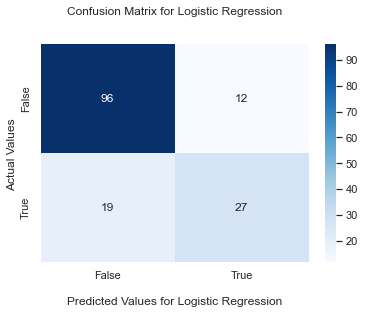

In [306]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values for Logistic Regression')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## A simple one layer neural network model

In [335]:
import tensorflow as tf
from tensorflow import keras

# callback function to to append logs
log=[]
class myCallback(tf.keras.callbacks.Callback):
  def on_test_batch_end(self, batch, logs=None):
    log.append(logs)

# creating a model 
def model_func():
    
    model = tf.keras.models.Sequential([
        keras.layers.Dense(14, activation='relu'),
        keras.layers.Dense(1,  activation='sigmoid'),
        ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Geting my trained model
model = model_func()

# Instantiate the callback class
callbacks = myCallback()
log=[]
# Training my model with batch size 32
train = model.fit(x_train, y_train, epochs=1000, verbose = 1)

Epoch 1/1000
20/20 [==============================] - 0s 973us/step - loss: 19.5428 - accuracy: 0.6384
Epoch 2/1000
20/20 [==============================] - 0s 1ms/step - loss: 11.0558 - accuracy: 0.6433
Epoch 3/1000
20/20 [==============================] - 0s 2ms/step - loss: 5.1989 - accuracy: 0.6547
Epoch 4/1000
20/20 [==============================] - 0s 2ms/step - loss: 3.9594 - accuracy: 0.6564
Epoch 5/1000
20/20 [==============================] - 0s 2ms/step - loss: 3.6714 - accuracy: 0.6710
Epoch 6/1000
20/20 [==============================] - 0s 2ms/step - loss: 3.4549 - accuracy: 0.6645
Epoch 7/1000
20/20 [==============================] - 0s 2ms/step - loss: 3.2402 - accuracy: 0.6612
Epoch 8/1000
20/20 [==============================] - 0s 1ms/step - loss: 3.0735 - accuracy: 0.6596
Epoch 9/1000
20/20 [==============================] - 0s 1ms/step - loss: 2.9436 - accuracy: 0.6547
Epoch 10/1000
20/20 [==============================] - 0s 1ms/step - loss: 2.7998 - accuracy: 0.

In [337]:
# scoring model on unseen data
log=[]
scores = model.evaluate(x_test, y_test, batch_size=32,callbacks=[myCallback()])
print(); print(model.metrics_names); print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 1ms/step - loss: 0.5492 - accuracy: 0.7662

['loss', 'accuracy']
[0.5492277145385742, 0.7662337422370911]

accuracy: 76.62%


In [338]:
# ploting accuracy 
import seaborn as sns
# convert log to dataframe to plot in seaborn
logs = pd.DataFrame(log)
sns.lineplot(data=logs["accuracy"])
plt.title("Neural Network Accuracy")

Text(0.5, 1.0, 'Neural Network Accuracy')

In [332]:
# Generating Generate predictions
predictions = model.predict(x_test)
predictions = tf.round(predictions)


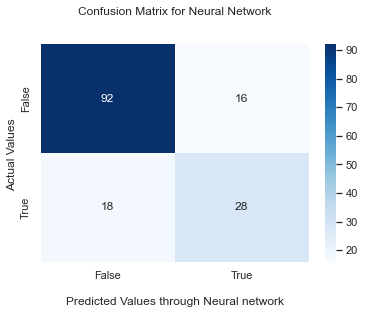

In [339]:
cm = confusion_matrix(y_test, predictions)
plt.figure()
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for Neural Network\n\n');
ax.set_xlabel('\nPredicted Values through Neural network')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()